In [5]:
import numpy as np
from IPython.display import Image

class Variable:
    def __init__(self, data):
        self.data = data

class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x) # 구체적인 계산은 forward 메서드에서 한다.
        output = Variable(y)
        return output
    
    def forward(self, x):
        raise NotImplementedError() # forward 메서드를 직접 호출한 사람에게 나타나는 예외. 이 메서드는 상속하여 구현해야 한다는 것을 알려준다.

class Square(Function):
    def forward(self, x):
        return x ** 2
    
class Exp(Function):
    def forward(self, x):
        return np.exp(x)

# 3.2 함수 연결

In [2]:
A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)
print(y.data)

1.648721270700128


3개의 함수를 연이어 적용했다. 여기서 중요한 점은 중간에 등장하는 4개의 변수 x, a, b, y가 모두 Variable 인스턴스 라는 것이다.  
Function 클래스의 __call__메서드의 입출력이 Variable 인스턴스로 통일되어 있기 때문에 이와 같이 여러 함수를 연속해서 적용할 수 있다.

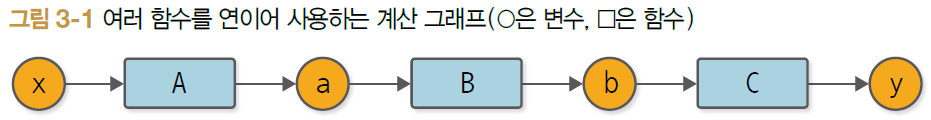

In [7]:
Image("../../밑바닥3 그림과 수식/그림 3-1.png")

이렇게 여러 함수를 순서대로 적용하여 만들어지는 변환을 큰 함수로 보아서 '합성 함수'라고 하기도 한다.  
이렇게 일련의 계산을 계산 그래프로 그린 이유는 계산 그래프를 이용하면 각 변수에 대한 미분을 효율적으로 계산할 수 있기 때문이다.  
변수별 미분을 계산하는 알고리즘이 바로 역전파이다.